## Step 1: Data Loading

In [32]:
# import necessary libraries
import pandas as pd
import chardet
import re
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [3]:
# Try reading the CSV with different encodings
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        df = pd.read_csv(r"TeePublic_review.csv", encoding=encoding)
        print(f"Successfully read the CSV with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read the CSV with encoding: {encoding}")
        

Failed to read the CSV with encoding: utf-8
Successfully read the CSV with encoding: latin1


In [4]:
# Display the first few rows
df.head()


reviewer_id store_location   latitude   longitude  date  month  \
0          0.0             US  37.090240  -95.712891  2023      6   
1          1.0             US  37.090240  -95.712891  2023      6   
2          2.0             US  37.090240  -95.712891  2023      6   
3          3.0             US  37.090240  -95.712891  2023      6   
4          4.0             CA  56.130366 -106.346771  2023      6   

            year                                          title  \
0  2015 00:00:00                     Great help with lost order   
1  2024 00:00:00  I ordered the wrong size tee and hadï¿½ï¿½ï¿½   
2  2017 00:00:00    These guys offer the best customerï¿½ï¿½ï¿½   
3  2024 00:00:00                                     Good Stuff   
4  2023 00:00:00     My order arrived in a good timelyï¿½ï¿½ï¿½   

                                              review  review-label  
0  I had an order that was lost in transit. When ...             5  
1  I ordered the wrong size tee and had difficult...             5  
2  These guys offer the best customer service in ...             5  
3  Looked for an obscure phrase on a shirt. Teepu...             5  
4  My order arrived in a good timely fashion & th...             4

In [5]:
df.shape

(278100, 10)

In [6]:
# Check number of null values
missing_values = df.isna().sum()
print("Missing values in each column:\n\n",missing_values)


Missing values in each column:

 reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 9
review            30503
review-label          0
dtype: int64


- We need to drop those null values since they are not helpful.

In [7]:

# Drop rows with missing values in crucial columns
df.dropna(subset=['reviewer_id', 'review','title'], inplace=True)


In [8]:
# Confirm number of null values
missing_values = df.isna().sum()
print("Missing values in each column:\n\n",missing_values)


Missing values in each column:

 reviewer_id       0
store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             0
review            0
review-label      0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247590 entries, 0 to 278098
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_id     247590 non-null  float64
 1   store_location  247590 non-null  object 
 2   latitude        247590 non-null  float64
 3   longitude       247590 non-null  float64
 4   date            247590 non-null  int64  
 5   month           247590 non-null  int64  
 6   year            247590 non-null  object 
 7   title           247590 non-null  object 
 8   review          247590 non-null  object 
 9   review-label    247590 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 20.8+ MB


## Step 2: Data Cleaning

In [21]:
df_copy = df.copy()
df_copy


reviewer_id store_location   latitude   longitude  date  month  \
0               0.0             US  37.090240  -95.712891  2023      6   
1               1.0             US  37.090240  -95.712891  2023      6   
2               2.0             US  37.090240  -95.712891  2023      6   
3               3.0             US  37.090240  -95.712891  2023      6   
4               4.0             CA  56.130366 -106.346771  2023      6   
...             ...            ...        ...         ...   ...    ...   
278094     278094.0             US  37.090240  -95.712891  2018      4   
278095     278095.0             US  37.090240  -95.712891  2018      4   
278096     278096.0             HR  45.100000   15.200000  2018      4   
278097     278097.0             US  37.090240  -95.712891  2018      4   
278098     278098.0             US  37.090240  -95.712891  2018      4   

                 year                                            title  \
0       2015 00:00:00                       Great help with lost order   
1       2024 00:00:00    I ordered the wrong size tee and hadï¿½ï¿½ï¿½   
2       2017 00:00:00      These guys offer the best customerï¿½ï¿½ï¿½   
3       2024 00:00:00                                       Good Stuff   
4       2023 00:00:00       My order arrived in a good timelyï¿½ï¿½ï¿½   
...               ...                                              ...   
278094  2027 00:00:00                                       Great site   
278095  2027 00:00:00                                Highly recommend!   
278096  2027 00:00:00                                    Great quality   
278097  2027 00:00:00                                      Dudes rock.   
278098  2027 00:00:00  Shipping was fast the T-shirt was justï¿½ï¿½ï¿½   

                                                   review  review-label  
0       I had an order that was lost in transit. When ...             5  
1       I ordered the wrong size tee and had difficult...             5  
2       These guys offer the best customer service in ...             5  
3       Looked for an obscure phrase on a shirt. Teepu...             5  
4       My order arrived in a good timely fashion & th...             4  
...                                                   ...           ...  
278094  Great site. Supports independent artists while...             5  
278095  Delivery is quick, arrives when promised. Shir...             5  
278096     Great quality, fast delivery, would recommend!             5  
278097                             Dudes rock. Seriously.             5  
278098  Shipping was fast the T-shirt was just right g...             5  

[247590 rows x 10 columns]

In [22]:


# Aggregate the data by store location
location_reviews = df_copy.groupby(['latitude', 'longitude', 'store_location']).agg({'reviewer_id': 'count'}).reset_index()
location_reviews.rename(columns={'reviewer_id': 'num_reviews'}, inplace=True)

# Display the column names to confirm they are correct
print(location_reviews.columns)

Index(['latitude', 'longitude', 'store_location', 'num_reviews'], dtype='object')


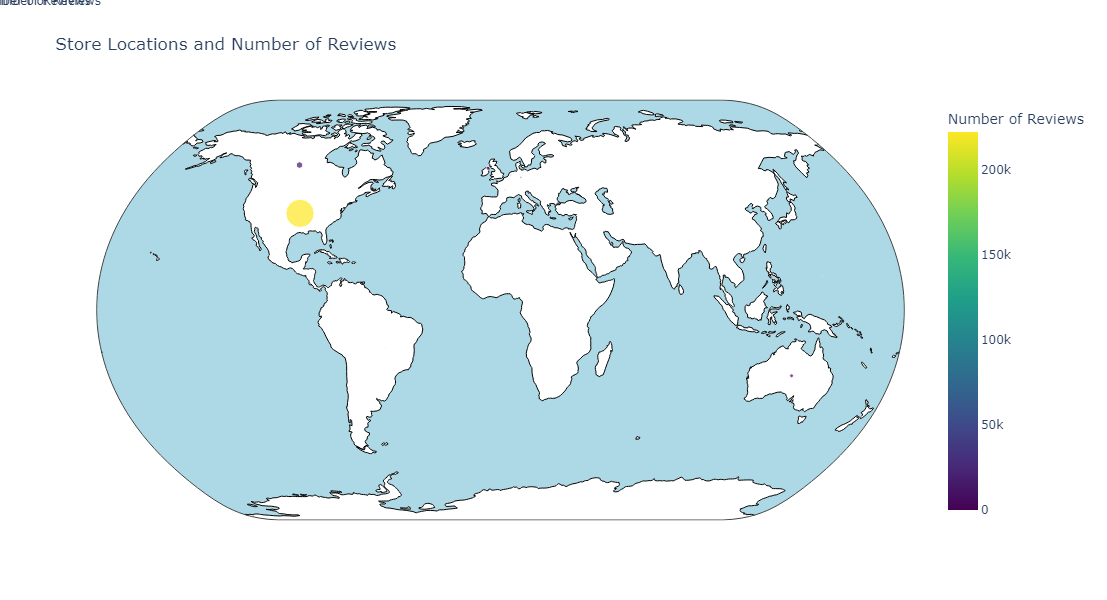

In [20]:
# Create the scatter map
fig = px.scatter_geo(location_reviews,
                     lat='latitude',
                     lon='longitude',
                     hover_name='store_location',
                     size='num_reviews',
                     color='num_reviews',  # Color by number of reviews
                     color_continuous_scale=px.colors.sequential.Viridis,
                     title='Store Locations and Number of Reviews',
                     projection="natural earth")  # Choose projection as needed

# Update layout for better visualization and increase figure size
fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="white",
        showocean=True,
        oceancolor="lightblue",
        coastlinecolor="black",
    ),
    coloraxis_colorbar=dict(
        title="Number of Reviews"
    ),
    width=1000,  # Adjust width as needed
    height=600,  # Adjust height as needed
)

# Add annotations for insight
fig.add_annotation(
    x=-95.712891,  # Longitude of USA
    y=37.09024,    # Latitude of USA
    text="USA: High Number of Reviews",
    showarrow=True,
    arrowhead=1,
    ax=50,
    ay=-50
)

fig.add_annotation(
    x=-106.346771,  # Longitude of Canada
    y=56.130366,    # Latitude of Canada
    text="Canada: High Number of Reviews",
    showarrow=True,
    arrowhead=1,
    ax=-50,
    ay=50
)

# Show the plot
fig.show()

### Insight:

- Canada and the USA have a high number of reviews indicating high number of angedgement

In [13]:
# # Create new features
df_copy['review_length'] = df_copy['review'].apply(len)
df_copy['title_length'] = df_copy['title'].apply(len)


In [14]:
df_copy.head()


reviewer_id store_location   latitude   longitude  date  month  \
0          0.0             US  37.090240  -95.712891  2023      6   
1          1.0             US  37.090240  -95.712891  2023      6   
2          2.0             US  37.090240  -95.712891  2023      6   
3          3.0             US  37.090240  -95.712891  2023      6   
4          4.0             CA  56.130366 -106.346771  2023      6   

            year                                          title  \
0  2015 00:00:00                     Great help with lost order   
1  2024 00:00:00  I ordered the wrong size tee and hadï¿½ï¿½ï¿½   
2  2017 00:00:00    These guys offer the best customerï¿½ï¿½ï¿½   
3  2024 00:00:00                                     Good Stuff   
4  2023 00:00:00     My order arrived in a good timelyï¿½ï¿½ï¿½   

                                              review  review-label  \
0  I had an order that was lost in transit. When ...             5   
1  I ordered the wrong size tee and had difficult...             5   
2  These guys offer the best customer service in ...             5   
3  Looked for an obscure phrase on a shirt. Teepu...             5   
4  My order arrived in a good timely fashion & th...             4   

   review_length  title_length  
0            196            26  
1            235            45  
2            161            43  
3            191            10  
4            314            42

In [49]:

# Drop columns unnecessary columns
columns_to_drop = [
    'reviewer_id',  'year', 'latitude', 'longitude','date','month'
]

df_copy2 = df_copy.drop(columns=columns_to_drop)
# df_copy2.head()


## Combine colums

In [54]:
# Combining title and review instead of dropping

df_copy2['combined'] = df_copy2['title'] + ' ' + df_copy2['review']

### Removed title and review columns 
drop_column = df_copy2.drop(columns=['title','review'],axis=1)


### View data visualization via plot/chart

In [57]:
# View ratings count
data = drop_column['review-label'].value_counts()
print(data)

5    181428
4     22944
1     16746
3     15743
2     10729
Name: review-label, dtype: int64


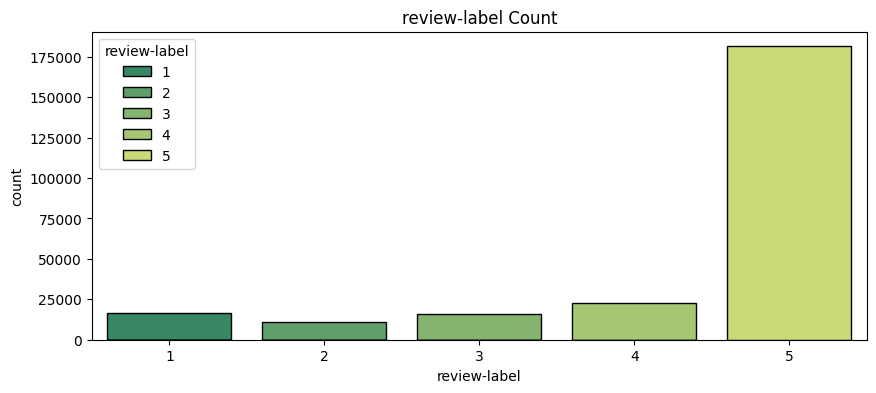

In [61]:
# Visualize the count in a better way
plt.figure(figsize=(10,4))
sns.countplot(data=drop_column,x='review-label',hue='review-label',edgecolor='black',palette='summer',  dodge=False)
plt.title('review-label Count')
plt.show()

### Creat a sentiment column based on score

In [63]:
### Create a sentiment column based on score 
a = drop_column['review-label']
def sentiment(a):
  if a > 3:
    return 'Positive'
  elif a == 3:
    return 'Neutral'
  else:
    return 'Negative'

drop_column['sentiment'] = drop_column['review-label'].apply(sentiment)
drop_column.head()

store_location  review-label  \
0             US             5   
1             US             5   
2             US             5   
3             US             5   
4             CA             4   

                                            combined sentiment  
0  Great help with lost order I had an order that...  Positive  
1  I ordered the wrong size tee and hadï¿½ï¿½ï¿½ ...  Positive  
2  These guys offer the best customerï¿½ï¿½ï¿½ Th...  Positive  
3  Good Stuff Looked for an obscure phrase on a s...  Positive  
4  My order arrived in a good timelyï¿½ï¿½ï¿½ My ...  Positive

## View sentiment review count via plot/chart

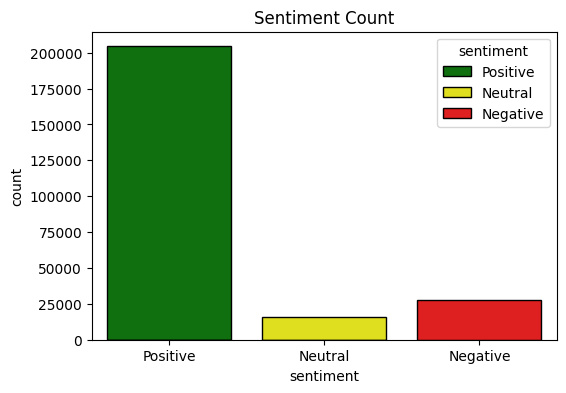

In [68]:
bar_chart = plt.figure(figsize=(6,4))
sns.countplot(data=drop_column,x='sentiment',edgecolor='black'
              ,palette={'Positive':'green','Neutral':'yellow','Negative':'red'},hue='sentiment',dodge=False )
plt.title('Sentiment Count')
plt.show()

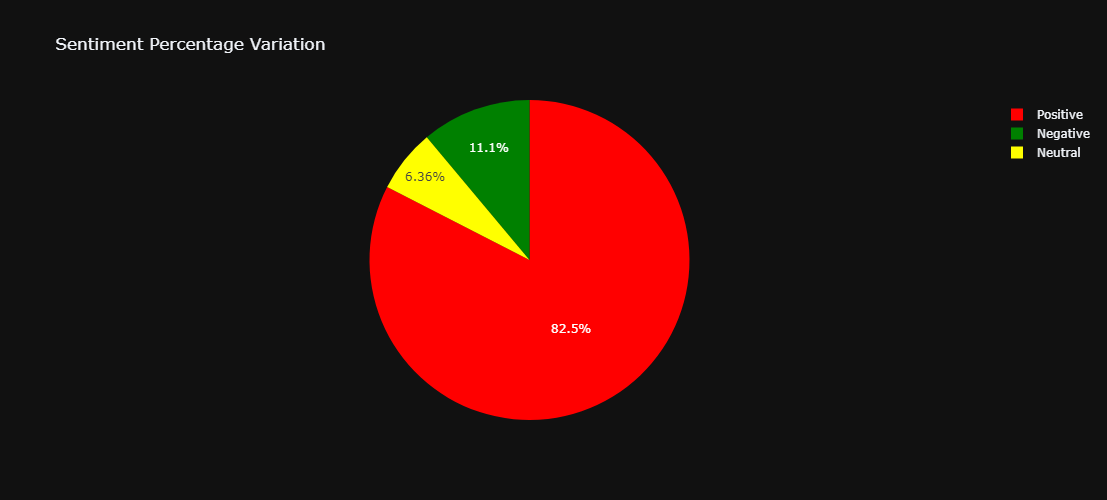

In [69]:
colors = ('red','green','yellow')
tags = drop_column['sentiment'].value_counts()
px.pie(tags,values=tags,names=tags.index,title='Sentiment Percentage Variation',height=500,width=800,color_discrete_sequence=colors,
       template='plotly_dark')

### Cleaning and tokenizing the string data.

In [76]:
content_column = drop_column.drop(columns=['store_location','review-label'],axis=1)
print(content_column.head())


                                            combined sentiment
0  Great help with lost order I had an order that...  Positive
1  I ordered the wrong size tee and hadï¿½ï¿½ï¿½ ...  Positive
2  These guys offer the best customerï¿½ï¿½ï¿½ Th...  Positive
3  Good Stuff Looked for an obscure phrase on a s...  Positive
4  My order arrived in a good timelyï¿½ï¿½ï¿½ My ...  Positive


In [ ]:
from preprocessing_function import CustomPreprocess

In [72]:
# Cleaning the data

# Testing

custom = CustomPreprocess()
custom.preprocess_text("Those were the best days of my life!")

'best days life '

In [77]:
# Calling preprocessing_text function on entire dataset
content_column['combined'] = content_column['combined'].apply(custom.preprocess_text)

content_column

combined sentiment
0       great help lost order order lost transit calle...  Positive
1       ordered wrong size tee ordered wrong size tee ...  Positive
2       guys offer best customer guys offer best custo...  Positive
3       good stuff looked obscure phrase shirt teepubl...  Positive
4       order arrived good timely order arrived good t...  Positive
...                                                   ...       ...
278094  great site great site supports independent art...  Positive
278095  highly recommend delivery quick arrives promis...  Positive
278096  great quality great quality fast delivery woul...  Positive
278097                   dudes rock dudes rock seriously   Positive
278098  shipping fast shirt shipping fast shirt right ...  Positive

[247590 rows x 2 columns]

## Filter the Positive review and plot the Positive review wordcloud

In [78]:
positive_result = content_column[content_column.sentiment == 'Positive']
print(positive_result.head())


                                            combined sentiment
0  great help lost order order lost transit calle...  Positive
1  ordered wrong size tee ordered wrong size tee ...  Positive
2  guys offer best customer guys offer best custo...  Positive
3  good stuff looked obscure phrase shirt teepubl...  Positive
4  order arrived good timely order arrived good t...  Positive


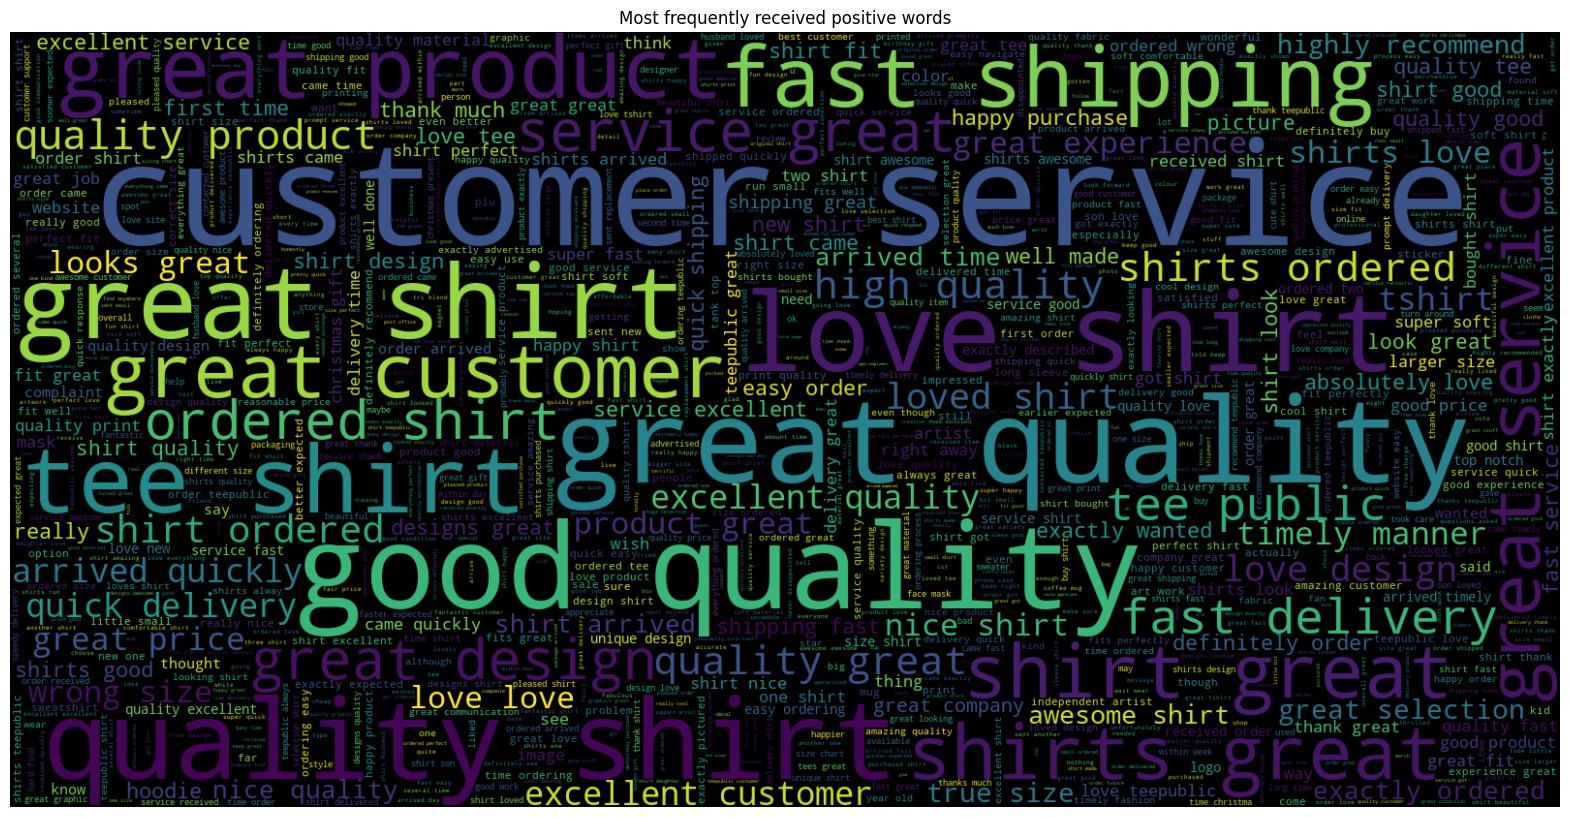

In [80]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

text = ' '.join([word for word in positive_result['combined']])
plt.figure(figsize=(20,16))
wordcloud = WordCloud(max_words=1000,background_color='black',height=800,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequently received positive words')
plt.show()

## Filter the Neutral review and plot the Neutral review wordcloud

In [81]:
neutral_result = content_column[content_column.sentiment == 'Neutral']
print(neutral_result.head())


                                             combined sentiment
10  love shirts love shirts wanted womens got mens...   Neutral
16  wish yes shirt material timeliness turnaround ...   Neutral
31  white fabric part shirt white fabric part shir...   Neutral
39  center screen prints look good however screen ...   Neutral
41  wonderful service sizing fast shipping great q...   Neutral


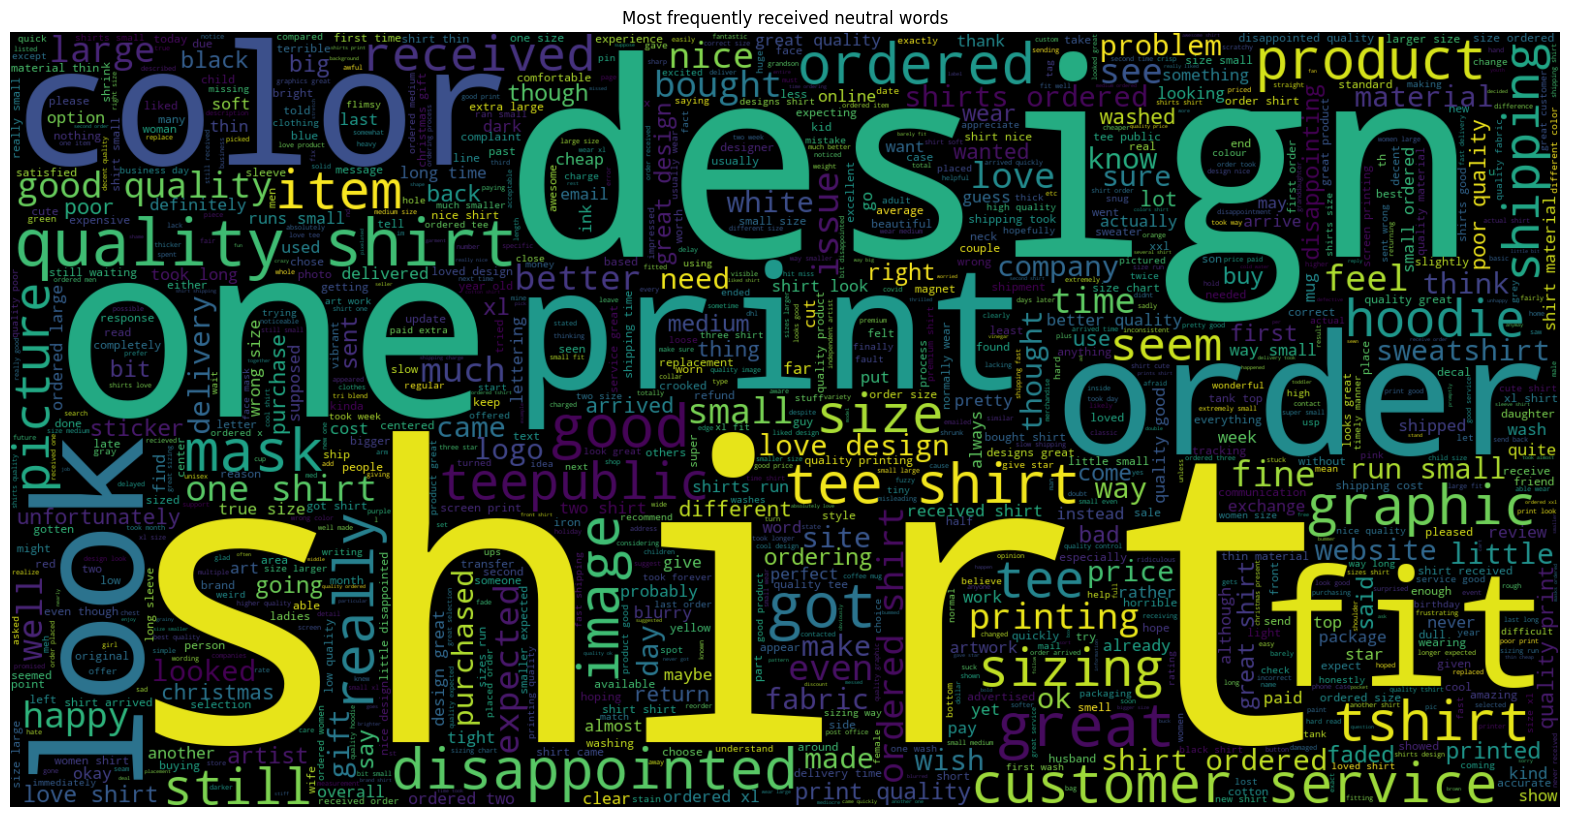

In [82]:
text= ' '.join([word for word in neutral_result['combined']])
plt.figure(figsize=(20,16))
wordcloud = WordCloud(max_words=1000,background_color='black',height=800,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequently received neutral words')
plt.show()

## Filter the Negative review and plot the Negative review wordcloud

In [83]:
negative_result = content_column[content_column.sentiment == 'Negative']
print(negative_result.head())


                                              combined sentiment
23   receive purchase receive purchase reached help...  Negative
47   tee originally ordered tee originally ordered ...  Negative
60   subpar communication horrible subpar communica...  Negative
73   arrogance ignorance opting daily spam started ...  Negative
125    shirts received shirts received wrong color bad  Negative


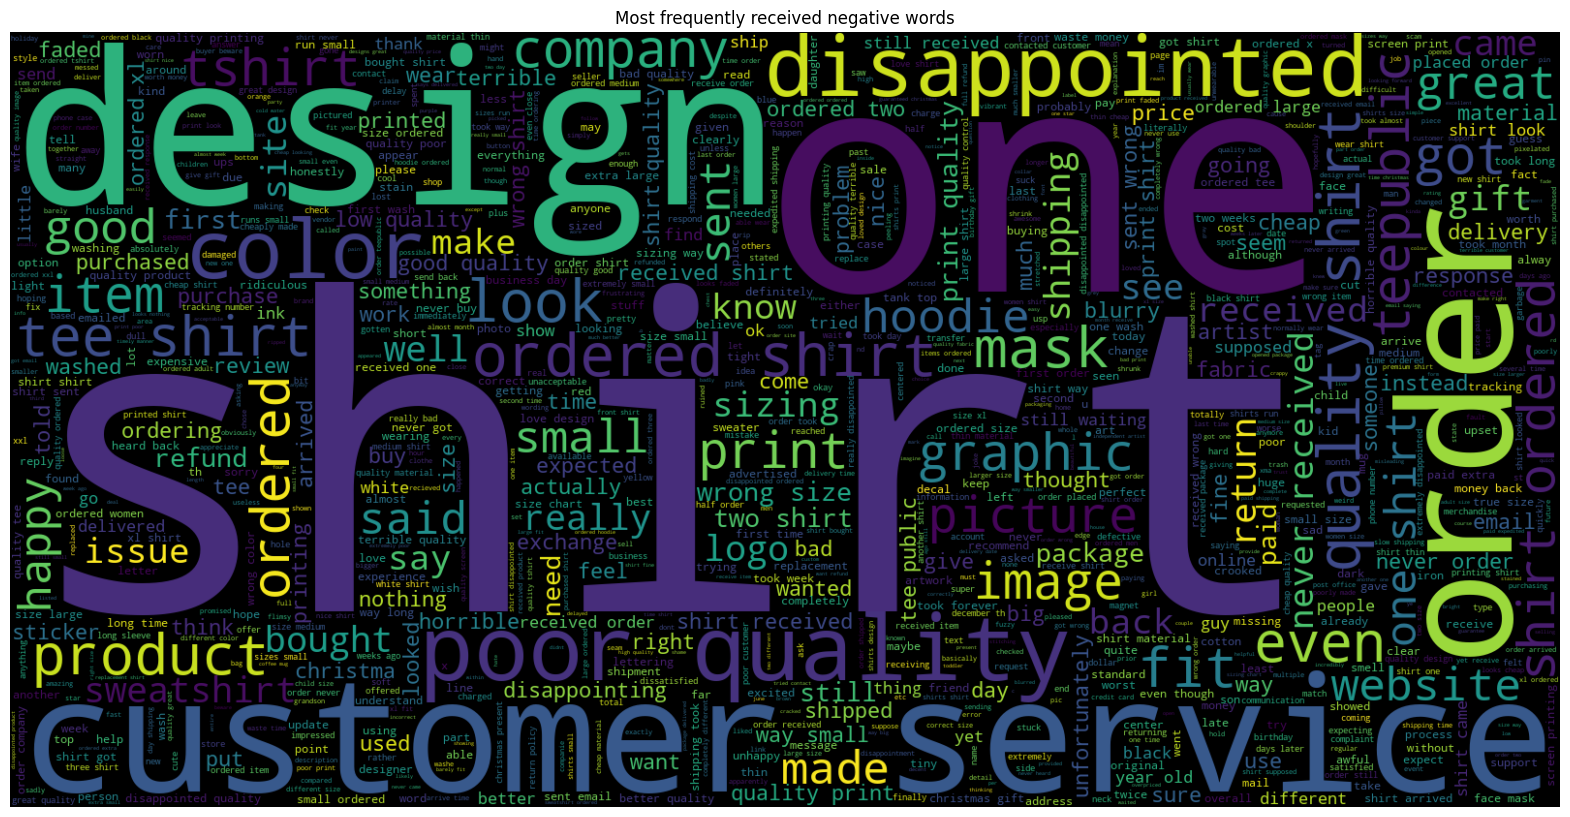

In [85]:
text = ' '.join([word for word in negative_result['combined']])
plt.figure(figsize=(20,16))
wordcloud = WordCloud(max_words=1000,background_color='black',height=800,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequently received negative words')
plt.show()


## Features extraction for Countvector

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(ngram_range=(1,2)).fit(content_column['combined'])
print(vector)


CountVectorizer(ngram_range=(1, 2))


In [89]:
feature_names = vector.get_feature_names_out()
print('Name of features: {}\n'.format(len(feature_names)))
print('First 20 features:\n{}'.format(feature_names[:20]))


Name of features: 877665

First 20 features:
['aa' 'aa lifetime' 'aa lot' 'aa medium' 'aa opposed' 'aa style'
 'aa symbol' 'aa website' 'aa well' 'aaa' 'aaa arrived' 'aaa artist'
 'aaa baseball' 'aaa brand' 'aaa disappointment' 'aaa excellent'
 'aaa gilden' 'aaa high' 'aaa needed' 'aaa shirts']


## Used Logestic Regression and check the final accuracy output

In [90]:
x = content_column['combined']
y = content_column['sentiment']
x = vector.transform(x)

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [92]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [93]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)


In [94]:
print('Accuracy: {:.2f}%'.format(accuracy*100))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))


Accuracy: 90.69%
Confusion Matrix:
 [[ 6159   910  1151]
 [ 1422  1376  1903]
 [  683   849 59824]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.75      0.75      8220
     Neutral       0.44      0.29      0.35      4701
    Positive       0.95      0.98      0.96     61356

    accuracy                           0.91     74277
   macro avg       0.71      0.67      0.69     74277
weighted avg       0.90      0.91      0.90     74277



In [96]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [99]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.876785545996742

In [98]:


print('Accuracy: {:.2f}%'.format(accuracy*100))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 87.68%
Confusion Matrix:
 [[ 4008    55  4157]
 [  790    47  3864]
 [  265    21 61070]]
Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.49      0.60      8220
     Neutral       0.38      0.01      0.02      4701
    Positive       0.88      1.00      0.94     61356

    accuracy                           0.88     74277
   macro avg       0.69      0.50      0.52     74277
weighted avg       0.84      0.88      0.84     74277

